In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist

In [42]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
print(f"x_train Shape: {x_train.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"x_test Shape: {x_test.shape}")
print(f"y_test Shape: {y_test.shape}")

x_train Shape: (60000, 28, 28)
y_train Shape: (60000,)
x_test Shape: (10000, 28, 28)
y_test Shape: (10000,)


In [43]:
category = np.array(['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

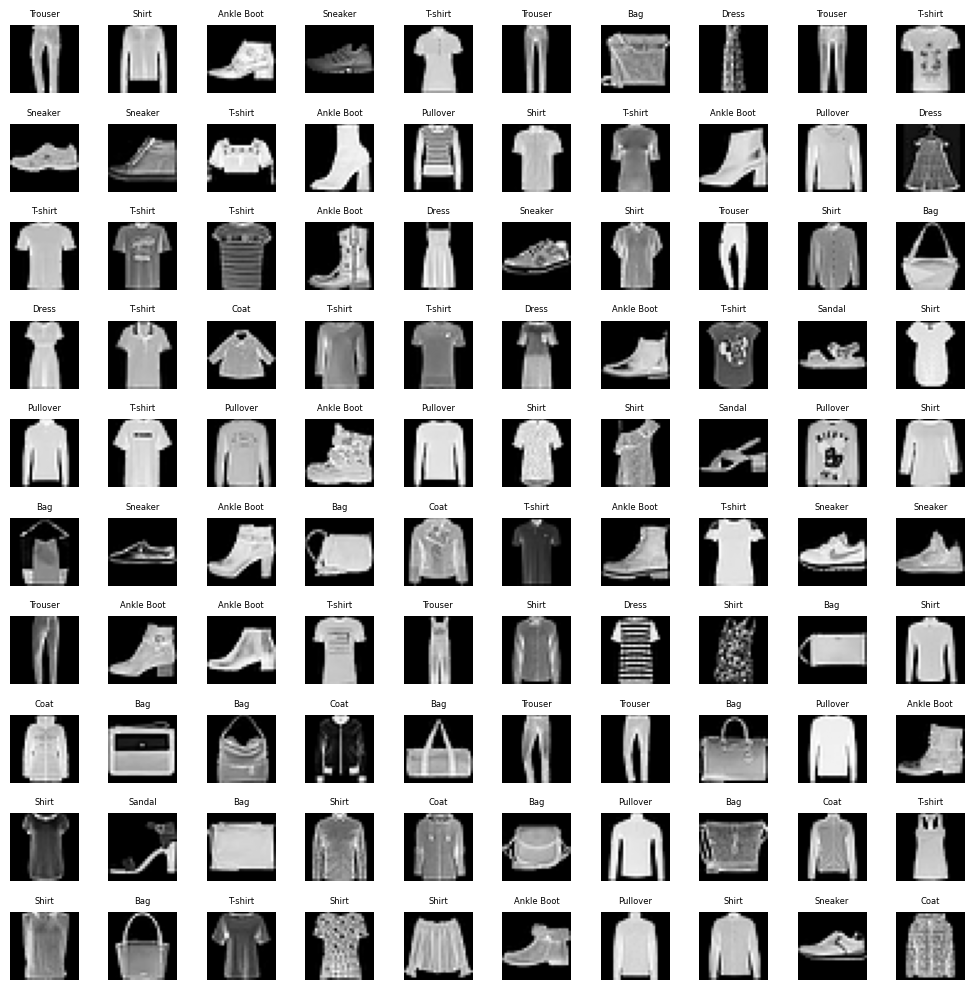

In [44]:
rand_index = np.random.choice(len(x_train), 100, replace=False)
images = x_train[rand_index]
labels = category[y_train[rand_index]]
fig,ax = plt.subplots(10,10, figsize=(10,10))
for i, ax in enumerate(ax.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(labels[i], fontsize=6) 
    ax.axis("off")
plt.tight_layout()
plt.show()

In [46]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(100,activation='relu'),
    Dense(75,activation='relu'),
    Dropout(0.2),
    Dense(50,activation='relu'),
    Dropout(0.2),
    Dense(25,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])
model.summary()

c:\Users\Abhinav Prakash\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,410 (357.07 KB)

 Trainable params: 91,410 (357.07 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer=Adam(0.001),
              loss=SparseCategoricalCrossentropy,
              metrics=['accuracy'])
model.fit(x_train,y_train,
          epochs = 15,
          validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9009 - loss: 0.2787 - val_accuracy: 0.9071 - val_loss: 0.2485
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9019 - loss: 0.2764 - val_accuracy: 0.9027 - val_loss: 0.2714
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9032 - loss: 0.2690 - val_accuracy: 0.9064 - val_loss: 0.2519
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9058 - loss: 0.2629 - val_accuracy: 0.9060 - val_loss: 0.2567
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9074 - loss: 0.2635 - val_accuracy: 0.9048 - val_loss: 0.2593
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9096 - loss: 0.2580 - val_accuracy: 0.8942 - val_loss: 0.2949
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9084 - loss: 0.2586 - val_accuracy: 0.9018 - val_loss: 0.2733
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9083 - loss: 0.2540 - 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


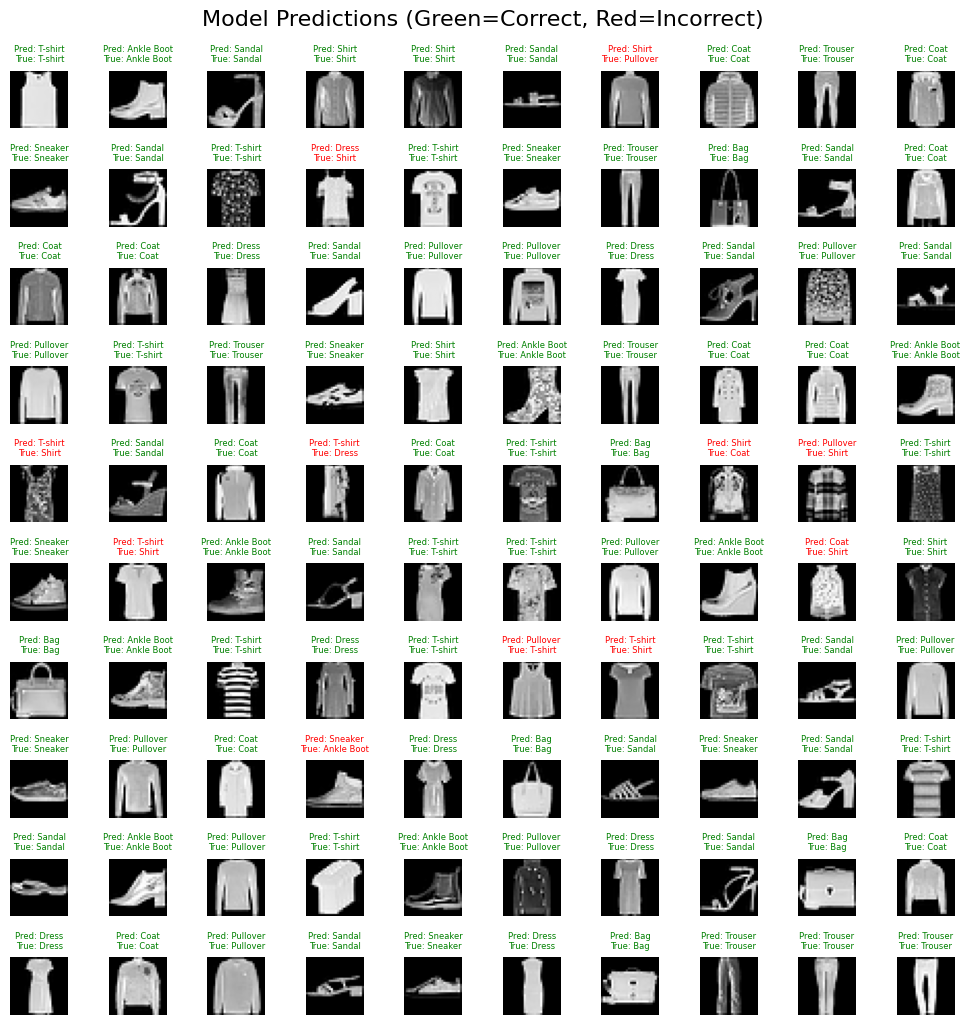

In [50]:
num_images = 100
indices = np.random.choice(len(x_test), num_images, replace=False)
images_to_predict = x_test[indices]
true_labels = y_test[indices]
predictions_raw = model.predict(images_to_predict)
predicted_labels = np.argmax(predictions_raw, axis=1)
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(10, 10, i + 1)
    plt.imshow(images_to_predict[i], cmap="gray")
    is_correct = (predicted_labels[i] == true_labels[i])
    title_color = 'green' if is_correct else 'red'
    plt.title(f"Pred: {category[predicted_labels[i]]}\nTrue: {category[true_labels[i]]}", color=title_color, fontsize=6)
    plt.axis("off")
plt.tight_layout()
plt.suptitle("Model Predictions (Green=Correct, Red=Incorrect)", y=1.02, fontsize=16)
plt.show()